# Classifying Email as Spam or Not Spam

# 1. Defining the Question

## a) Specifying the Question

Use the given dataset to correctly classify whether an email is spam or not spam based on a number of given features.

## b) Defining the metric of success

The Naive Bayes model will be considered successful if it has an accuracy of 90% and above.

## c) Understanding the context

The data is of different emails received and whether they were classified as spam or not.

## d) Recording the Experimental Design

For this project, I'll be doing the following:
1. Data cleaning
2. Exploratory Data Analysis with focus on univariate and bivariate analysis
3. Naive Bayes model

## e) Data Relevance

The data provided is of relevance to the question. It has a wide range of variables that will be useful in classifying whether an email is spam or not.

# 2. Reading the Data

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [14]:
# Load the dataset

email = pd.read_csv('/content/spambasedata.csv')
email.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0,1.0


# 3. Checking the Data

In [4]:
# Determine the no of records in the dataset

email.shape

(4601, 58)

In [5]:
# Check datatypes of the columns

email.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

# 4. External Data Source Validation

# 5. Tidying the Dataset

In [15]:
# Check for missing values

email.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                1
word_freq_font                1
word_freq_000                 1
word_freq_money               1
word_freq_hp                  1
word_freq_hpl                 1
word_freq_george              1
word_freq_650                 1
word_freq_lab                 1
word_freq_labs                1
word_freq_telnet              1
word_fre

In [16]:
# Drop missing values

email.dropna(inplace = True)

In [17]:
# Check if the changes have been made

email.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [18]:
# Check for duplicated values

email.duplicated().any()

True

In [19]:
# Drop the duplicated columns

email.drop_duplicates(keep = False, inplace = True)

In [20]:
# Check whether changes have been made

email.duplicated().any()

False

In [21]:
# Check for outliers

# Find IQR Score first

Q1 = email.quantile(0.25)
Q3 = email.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

word_freq_make                  0.0000
word_freq_address               0.0000
word_freq_all                   0.4400
word_freq_3d                    0.0000
word_freq_our                   0.4050
word_freq_over                  0.0000
word_freq_remove                0.0000
word_freq_internet              0.0000
word_freq_order                 0.0000
word_freq_mail                  0.1900
word_freq_receive               0.0000
word_freq_will                  0.8250
word_freq_people                0.0000
word_freq_report                0.0000
word_freq_addresses             0.0000
word_freq_free                  0.1300
word_freq_business              0.0000
word_freq_email                 0.0000
word_freq_you                   2.7000
word_freq_credit                0.0000
word_freq_your                  1.3100
word_freq_font                  0.0000
word_freq_000                   0.0000
word_freq_money                 0.0000
word_freq_hp                    0.0000
word_freq_hpl            

In [22]:
# Multiply the (IQR) by 1.5
# Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

(email < (Q1 - 1.5 * IQR)) |(email > (Q3 + 1.5 * IQR))


# True indicates the prescence of an outlier

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
1,True,True,False,False,False,True,True,True,False,True,True,False,True,True,True,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,True,True,True,True,False
2,True,False,False,False,True,True,True,True,True,False,True,False,True,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4596,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False
4598,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False

In [23]:
# Remove the outliers

email_outliers = email[~((email < (Q1 - 1.5 * IQR)) |(email > (Q3 + 1.5 * IQR))).any(axis=1)]
email_outliers.shape

# The rows removed from this dataset as outliers are too many. Hence I wont be using the dataframe that has no outliers

(102, 58)

# 6. Exploratory Data Analysis

## a) Univariate Analysis

In [ ]:
# Check the descriptive features

email.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000
mean,0.107740,0.137395,0.290439,0.068181,0.320847,0.099443,0.118272,0.109336,0.093817,0.246806,0.061148,0.561968,0.097649,0.061096,0.051123,0.257044,0.147719,0.191649,1.712297,0.086695,0.838263,0.126217,0.105570,0.092482,0.566023,0.272813,0.457914,0.127228,0.095975,0.104458,0.064904,0.046453,0.101325,0.047273,0.107126,0.098811,0.139663,0.013758,0.081520,0.064988,0.043354,0.135228,0.047579,0.082360,0.311409,0.184800,0.005674,0.033212,0.039070,0.142156,0.016216,0.278139,0.078923,0.046102,5.336247,53.967837,293.810872,0.405889
std,0.308151,0.750233,0.510632,1.424177,0.675835,0.278481,0.397560,0.408571,0.283806,0.649884,0.200810,0.872148,0.306572,0.341952,0.263995,0.839812,0.451576,0.540658,1.772254,0.508609,1.205264,1.046839,0.356787,0.415859,1.691141,0.898071,2.321708,0.539896,0.558469,0.454700,0.398850,0.319360,0.567133,0.320312,0.533512,0.397911,0.422820,0.225235,0.443065,0.342198,0.354755,0.775265,0.227503,0.634711,1.028978,0.921812,0.077856,0.291616,0.246626,0.271026,0.094692,0.830208,0.250516,0.438197,32.380588,198.664686,616.505494,0.491119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.635500,7.000000,39.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

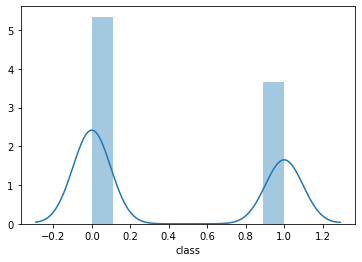

In [ ]:
sns.distplot(email["class"])

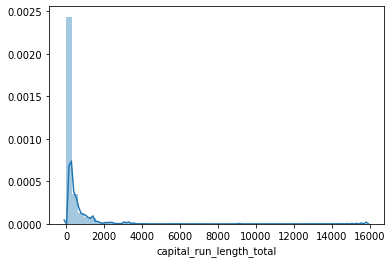

In [ ]:
sns.distplot(email["capital_run_length_total"])

**Observation**

1. Most of the emails are not spam (class 0)

## b) Bivariate Analysis

In [ ]:
# Create a correlation matrix
correlation = email.corr()
correlation


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.006570,0.061148,0.012933,0.018424,0.057496,0.005359,-0.006453,0.104340,0.039687,0.164914,0.094120,0.064292,0.035383,0.026977,0.056617,0.079138,0.050913,0.122073,0.021894,0.035074,-0.006713,0.024727,0.044372,-0.039554,-0.028480,-0.013753,-0.014883,-0.033171,-0.011969,-0.019245,-0.021639,-0.005058,-0.021971,-0.024493,-0.013930,-0.033978,-0.008418,-0.040400,-0.019082,-0.016391,-0.017809,-0.038427,-0.006119,-0.029054,-0.016912,-0.015357,0.008614,-0.016192,-0.030763,-0.021972,0.023802,0.054614,0.031301,0.027628,0.026985,0.029015,0.122365
word_freq_address,0.006570,1.000000,-0.001289,-0.007332,0.006532,-0.007386,0.036414,-0.001915,0.026575,0.098089,0.020041,-0.005901,-0.000983,0.001835,0.028765,0.014832,0.001145,0.094526,0.000328,-0.009934,0.019810,0.038753,0.002596,0.002091,-0.021422,-0.011087,0.031467,-0.000640,-0.016267,-0.010521,0.016153,0.024066,-0.019147,0.024598,-0.019100,-0.002762,-0.024075,-0.006275,-0.012891,-0.010082,-0.001242,-0.025488,0.012371,0.018569,-0.017518,-0.016477,-0.001474,0.029162,0.043928,-0.006779,-0.008007,0.011529,0.020243,0.008543,0.006896,0.016767,0.012444,0.031093
word_freq_all,0.061148,-0.001289,1.000000,-0.021324,0.071344,0.080652,0.030979,0.006751,0.088360,0.027742,0.047269,0.071563,0.041563,0.005201,0.119547,0.057696,0.030679,0.116364,0.126488,0.031296,0.106216,0.033222,0.055179,0.042137,-0.064223,-0.065869,-0.063484,-0.033236,-0.051253,-0.052316,-0.049735,-0.050972,-0.030210,-0.050773,-0.046702,-0.054151,-0.019595,-0.019184,-0.033368,-0.026321,-0.025869,-0.045645,-0.050590,-0.024345,-0.037197,-0.020467,-0.015614,-0.026289,0.004030,-0.014899,-0.032387,0.047557,0.048976,0.008800,0.067649,0.057835,0.057944,0.186434
word_freq_3d,0.012933,-0.007332,-0.021324,1.000000,0.002679,-0.010662,0.019397,0.009817,-0.003092,-0.005555,-0.013612,-0.020501,-0.013813,0.011671,0.002361,0.006993,0.002939,0.018836,-0.012436,-0.005612,0.024848,-0.005383,-0.006212,0.002946,-0.015590,-0.013986,-0.009397,-0.010957,-0.008200,-0.010965,-0.007751,-0.006914,-0.008549,-0.007016,-0.009145,0.011513,-0.014653,-0.002925,-0.007777,0.011348,-0.005852,-0.008211,-0.009367,-0.006098,-0.004861,-0.009388,-0.003490,-0.005454,-0.003791,-0.004007,0.000541,0.008325,0.002062,-0.003826,-0.001423,-0.002767,-0.003480,0.057127
word_freq_our,0.018424,0.006532,0.071344,0.002679,1.000000,0.051333,0.141778,0.024380,0.017030,0.032558,0.068670,0.059183,0.027945,0.001222,0.054765,0.075876,0.139936,0.057379,0.091371,0.028434,0.090293,0.026945,0.075554,0.053778,-0.023486,-0.043787,-0.054133,-0.044677,-0.010094,-0.050044,-0.046436,-0.031897,-0.025663,-0.029778,-0.045578,-0.042116,-0.062428,0.010668,-0.032252,-0.019384,-0.035032,0.014024,-0.042448,-0.026211,0.000881,-0.060469,0.017400,-0.004610,-0.026113,-0.035826,-0.024821,0.043565,0.061392,0.003749,0.045290,0.047511,0.064240,0.236822
word_freq_over,0.057496,-0.007386,0.080652,-0.010662,0.051333,1.000000,0.058573,0.076949,0.113960,0.010724,0.053611,0.002114,0.074275,0.007443,0.171444,0.015871,0.061133,0.074767,0.087178,0.060042,0.102885,0.016345,0.112778,0.048416,-0.082361,-0.060990,-0

1. word_freq_telnet and word_freq_415 are strongly positively correlated.
2. word_freq_857 and word_freq_415 are strongly positively correlated.

# 7. Naive Bayes Model

## Multicollinearity check

In [24]:
# Focus here is on the independent variables only
independent_variables = email.drop(columns=['class'])

# Let's display the correlations between the variables
b = independent_variables.corr()
b

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.000000,0.006570,0.061148,0.012933,0.018424,0.057496,0.005359,-0.006453,0.104340,0.039687,0.164914,0.094120,0.064292,0.035383,0.026977,0.056617,0.079138,0.050913,0.122073,0.021894,0.035074,-0.006713,0.024727,0.044372,-0.039554,-0.028480,-0.013753,-0.014883,-0.033171,-0.011969,-0.019245,-0.021639,-0.005058,-0.021971,-0.024493,-0.013930,-0.033978,-0.008418,-0.040400,-0.019082,-0.016391,-0.017809,-0.038427,-0.006119,-0.029054,-0.016912,-0.015357,0.008614,-0.016192,-0.030763,-0.021972,0.023802,0.054614,0.031301,0.027628,0.026985,0.029015
word_freq_address,0.006570,1.000000,-0.001289,-0.007332,0.006532,-0.007386,0.036414,-0.001915,0.026575,0.098089,0.020041,-0.005901,-0.000983,0.001835,0.028765,0.014832,0.001145,0.094526,0.000328,-0.009934,0.019810,0.038753,0.002596,0.002091,-0.021422,-0.011087,0.031467,-0.000640,-0.016267,-0.010521,0.016153,0.024066,-0.019147,0.024598,-0.019100,-0.002762,-0.024075,-0.006275,-0.012891,-0.010082,-0.001242,-0.025488,0.012371,0.018569,-0.017518,-0.016477,-0.001474,0.029162,0.043928,-0.006779,-0.008007,0.011529,0.020243,0.008543,0.006896,0.016767,0.012444
word_freq_all,0.061148,-0.001289,1.000000,-0.021324,0.071344,0.080652,0.030979,0.006751,0.088360,0.027742,0.047269,0.071563,0.041563,0.005201,0.119547,0.057696,0.030679,0.116364,0.126488,0.031296,0.106216,0.033222,0.055179,0.042137,-0.064223,-0.065869,-0.063484,-0.033236,-0.051253,-0.052316,-0.049735,-0.050972,-0.030210,-0.050773,-0.046702,-0.054151,-0.019595,-0.019184,-0.033368,-0.026321,-0.025869,-0.045645,-0.050590,-0.024345,-0.037197,-0.020467,-0.015614,-0.026289,0.004030,-0.014899,-0.032387,0.047557,0.048976,0.008800,0.067649,0.057835,0.057944
word_freq_3d,0.012933,-0.007332,-0.021324,1.000000,0.002679,-0.010662,0.019397,0.009817,-0.003092,-0.005555,-0.013612,-0.020501,-0.013813,0.011671,0.002361,0.006993,0.002939,0.018836,-0.012436,-0.005612,0.024848,-0.005383,-0.006212,0.002946,-0.015590,-0.013986,-0.009397,-0.010957,-0.008200,-0.010965,-0.007751,-0.006914,-0.008549,-0.007016,-0.009145,0.011513,-0.014653,-0.002925,-0.007777,0.011348,-0.005852,-0.008211,-0.009367,-0.006098,-0.004861,-0.009388,-0.003490,-0.005454,-0.003791,-0.004007,0.000541,0.008325,0.002062,-0.003826,-0.001423,-0.002767,-0.003480
word_freq_our,0.018424,0.006532,0.071344,0.002679,1.000000,0.051333,0.141778,0.024380,0.017030,0.032558,0.068670,0.059183,0.027945,0.001222,0.054765,0.075876,0.139936,0.057379,0.091371,0.028434,0.090293,0.026945,0.075554,0.053778,-0.023486,-0.043787,-0.054133,-0.044677,-0.010094,-0.050044,-0.046436,-0.031897,-0.025663,-0.029778,-0.045578,-0.042116,-0.062428,0.010668,-0.032252,-0.019384,-0.035032,0.014024,-0.042448,-0.026211,0.000881,-0.060469,0.017400,-0.004610,-0.026113,-0.035826,-0.024821,0.043565,0.061392,0.003749,0.045290,0.047511,0.064240
word_freq_over,0.057496,-0.007386,0.080652,-0.010662,0.051333,1.000000,0.058573,0.076949,0.113960,0.010724,0.053611,0.002114,0.074275,0.007443,0.171444,0.015871,0.061133,0.074767,0.087178,0.060042,0.102885,0.016345,0.112778,0.048416,-0.082361,-0.060990,-0.054851,-0.059210,-0.042307,-0.050312,-0.046450,-0.

In [25]:
# Find the inverse of the correlation matrix

pd.DataFrame(np.linalg.inv(b.values), index = b.index, columns=b.columns)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.070513,-0.000157,-0.026963,-0.020441,0.013601,-0.035083,0.048861,0.050154,-0.078821,-0.000411,-0.138846,-0.074663,-0.042161,-0.019531,0.019928,-0.041160,-0.049903,-0.021011,-0.088980,0.019020,0.015280,0.024313,0.008966,-0.017178,0.018799,-0.010146,0.001112,-0.017603,0.025910,-0.015135,-0.001755,-0.050315,-0.005484,0.035873,0.012732,-0.010729,0.006379,0.009568,0.021170,0.016313,0.004876,-0.012997,0.012668,-0.004312,0.012521,0.005915,0.005977,-0.016570,-0.000772,0.030436,0.005693,0.005502,-0.033159,-0.030330,-0.018411,-0.011399,-0.004360
word_freq_address,-0.000157,1.034242,0.010997,0.008360,-0.001337,0.012980,-0.025529,0.011916,-0.012706,-0.098818,-0.001923,0.008273,0.007761,-0.003984,0.009897,-0.000709,0.013036,-0.095412,0.015881,0.016458,-0.014409,-0.017013,0.004989,0.008162,0.012320,-0.000502,-0.036411,-0.012106,0.027638,0.020823,-0.033914,-0.079858,0.012370,-0.061245,0.033619,0.014145,0.021899,0.003512,0.006527,0.103018,-0.009158,0.008156,-0.025196,-0.020152,0.017859,0.008472,0.001840,-0.027998,-0.038057,0.017019,0.002911,-0.004244,-0.014360,-0.002562,0.006606,-0.018353,0.003788
word_freq_all,-0.026963,0.010997,1.072443,0.025027,-0.039868,-0.032917,0.020158,0.021763,-0.047057,0.013255,0.008809,-0.064559,-0.014429,-0.000007,-0.079220,-0.035490,0.011802,-0.075314,-0.087519,-0.011052,-0.062298,-0.022265,-0.010306,-0.004956,0.008347,0.018269,0.041427,-0.030110,0.016135,0.010855,0.011478,0.006043,0.015221,0.029895,0.009298,0.021955,-0.029533,0.014379,0.008761,-0.047565,0.012633,0.015898,0.029808,0.006711,0.021461,0.009151,0.009256,0.018796,-0.006293,-0.013318,0.013934,-0.015945,0.004793,0.001276,-0.063305,0.015053,-0.015940
word_freq_3d,-0.020441,0.008360,0.025027,1.006802,-0.002050,0.015341,-0.016760,-0.010993,0.003940,0.003899,0.020659,0.018012,0.016501,-0.014783,-0.004289,-0.002423,0.000741,-0.021046,0.016170,0.006177,-0.024003,0.003501,0.011874,0.001337,0.012064,0.005667,0.008052,0.012913,0.007619,0.010986,0.020191,0.022476,0.007675,0.026326,0.005515,-0.048513,0.007892,0.001871,0.004479,-0.055914,0.000731,0.002486,0.003127,0.004658,0.002749,0.006486,0.005064,0.006255,-0.000579,-0.005750,-0.004104,-0.007322,0.001938,0.001860,-0.001765,0.008236,0.004369
word_freq_our,0.013601,-0.001337,-0.039868,-0.002050,1.070801,-0.019706,-0.098734,0.020908,0.033012,0.000753,-0.011629,-0.052767,-0.008342,-0.002191,-0.035743,-0.046852,-0.114577,-0.013395,-0.051356,0.008084,-0.030696,-0.031039,-0.032655,-0.023153,-0.043825,0.010080,0.032120,-0.001047,-0.008592,0.023171,0.026806,0.251973,0.007653,-0.273463,0.016418,0.008721,0.029782,-0.010396,0.001547,-0.010481,0.002857,-0.035050,0.012508,0.007887,-0.025998,0.038541,-0.026529,-0.008489,0.031030,0.012257,0.011816,-0.006424,-0.004911,0.006480,-0.034365,0.009124,-0.035073
word_freq_over,-0.035083,0.012980,-0.032917,0.015341,-0.019706,1.082979,-0.016095,-0.043744,-0.057414,0.042778,0.003671,0.009895,-0.049455,0.001319,-0.145129,0.018502,-0.003798,-0.008745,-0.041241,-0.030153,-0.046559,-0.020792,-0.063537,-0.008281,0.037875,-0.005042,0.033391,0.021538,0.001770,-0.001675,0.016006,-0.110474,

2 variables, word_freq_857 and word_freq_415 have a VIF score of 120.56 and 117.46 respectively which is well over 4. 

I'll drop the variable word_freq_857 to see if the VIF score of the other variable will reduce.

In [26]:
email_revised = independent_variables.drop(columns=['word_freq_857'])

correlations = email_revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.070492,-0.000190,-0.026960,-0.020432,0.013706,-0.035129,0.048823,0.050347,-0.078844,-0.000303,-0.138780,-0.074691,-0.042229,-0.019526,0.019880,-0.041159,-0.050061,-0.021027,-0.089077,0.018978,0.015199,0.024274,0.008903,-0.017258,0.018765,-0.010167,0.001049,-0.017605,0.025681,-0.015316,-0.001997,-0.005507,-0.012796,0.012652,-0.011023,0.006495,0.009549,0.021147,0.015477,0.004880,-0.012936,0.012584,-0.004321,0.012453,0.005877,0.005966,-0.016590,-0.000817,0.030293,0.005701,0.005607,-0.032977,-0.030298,-0.018015,-0.011422,-0.004307
word_freq_address,-0.000190,1.034189,0.011001,0.008375,-0.001170,0.012906,-0.025588,0.012222,-0.012742,-0.098647,-0.001818,0.008228,0.007654,-0.003977,0.009819,-0.000708,0.012786,-0.095437,0.015726,0.016391,-0.014537,-0.017076,0.004887,0.008035,0.012268,-0.000535,-0.036511,-0.012110,0.027274,0.020534,-0.034299,0.012333,-0.138491,0.033491,0.013678,0.022082,0.003482,0.006490,0.101690,-0.009152,0.008254,-0.025330,-0.020165,0.017751,0.008413,0.001823,-0.028030,-0.038128,0.016792,0.002924,-0.004076,-0.014070,-0.002511,0.007235,-0.018389,0.003874
word_freq_all,-0.026960,0.011001,1.072442,0.025026,-0.039881,-0.032911,0.020163,0.021740,-0.047054,0.013242,0.008801,-0.064556,-0.014421,-0.000008,-0.079214,-0.035490,0.011821,-0.075312,-0.087507,-0.011047,-0.062288,-0.022260,-0.010299,-0.004947,0.008351,0.018271,0.041435,-0.030110,0.016162,0.010876,0.011507,0.015223,0.035741,0.009308,0.021990,-0.029547,0.014382,0.008764,-0.047465,0.012632,0.015891,0.029818,0.006712,0.021469,0.009156,0.009257,0.018799,-0.006287,-0.013301,0.013933,-0.015958,0.004771,0.001272,-0.063352,0.015056,-0.015946
word_freq_3d,-0.020432,0.008375,0.025026,1.006798,-0.002097,0.015362,-0.016743,-0.011079,0.003950,0.003851,0.020630,0.018025,0.016531,-0.014785,-0.004268,-0.002424,0.000812,-0.021039,0.016213,0.006196,-0.023966,0.003519,0.011902,0.001372,0.012078,0.005676,0.008080,0.012914,0.007721,0.011067,0.020299,0.007686,0.048067,0.005550,-0.048381,0.007840,0.001879,0.004489,-0.055541,0.000729,0.002458,0.003164,0.004661,0.002780,0.006503,0.005069,0.006264,-0.000559,-0.005686,-0.004108,-0.007369,0.001857,0.001846,-0.001942,0.008247,0.004345
word_freq_our,0.013706,-0.001170,-0.039881,-0.002097,1.070275,-0.019476,-0.098545,0.019944,0.033124,0.000213,-0.011960,-0.052626,-0.008004,-0.002216,-0.035499,-0.046855,-0.113787,-0.013316,-0.050868,0.008296,-0.030290,-0.030840,-0.032335,-0.022753,-0.043658,0.010182,0.032435,-0.001036,-0.007445,0.024081,0.028020,0.007769,-0.029730,0.016820,0.010193,0.029202,-0.010301,0.001664,-0.006291,0.002837,-0.035360,0.012931,0.007930,-0.025655,0.038729,-0.026476,-0.008389,0.031254,0.012973,0.011775,-0.006953,-0.005825,0.006318,-0.036348,0.009239,-0.035342
word_freq_over,-0.035129,0.012906,-0.032911,0.015362,-0.019476,1.082878,-0.016178,-0.043321,-0.057464,0.043014,0.003816,0.009833,-0.049604,0.001330,-0.145236,0.018504,-0.004144,-0.008780,-0.041455,-0.030245,-0.046737,-0.020879,-0.063677,-0.008456,0.037802,-0.005087,0.033253,0.021533,0.001267,-0.002074,0.015474,0.016092,0.007591,0.002043,-0.019805,-0.018281,0.005517,0.017905,-0.01

The VIF score of the variable word_freq_415 has dropped from 117.46 to 4.65. This shows that the two variables were colinear. variables are no longer colinear.

## Model 1: 80 - 20 set

In [27]:
# Divide the data into features and labels

X = email_revised.iloc[:, 0:]
y = email.iloc[:, 57]

In [28]:
# Normalize the features so they have values between 0 and 1

# Create normalizer

normalizer = Normalizer(norm='l2')

# Transform feature matrix

normalizer.transform(X)

array([[0.00000000e+00, 6.19574416e-04, 6.19574416e-04, ...,
        4.95078682e-03, 9.77765876e-02, 9.95191406e-01],
       [9.08893441e-05, 1.21185792e-04, 2.16403200e-04, ...,
        4.25059166e-03, 2.09911104e-01, 9.77709658e-01],
       [3.07378553e-04, 0.00000000e+00, 3.63731288e-03, ...,
        1.81199657e-02, 2.04919035e-01, 9.78488393e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.18659542e-02, 5.07092061e-02, 9.97281054e-01],
       [3.83570373e-03, 0.00000000e+00, 3.83570373e-03, ...,
        1.46651739e-02, 6.39283955e-02, 9.97282969e-01],
       [2.37333459e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.09027941e-02, 1.23611176e-01, 9.88889410e-01]])

In [29]:
# Divide the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
# Instantiate the GaussianNB()

model = GaussianNB()

# Fit the model

model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
# Make predictions on the test data

y_pred = model.predict(X_test)

In [32]:
# Evaluate the performance of the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8244620611551529
[[385 134]
 [ 21 343]]
              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       519
         1.0       0.72      0.94      0.82       364

    accuracy                           0.82       883
   macro avg       0.83      0.84      0.82       883
weighted avg       0.85      0.82      0.83       883



The proportion of correct classifications is at 82%. 

The results from the confusion matrix show that 385 and 343 are the number of correct predictions.
134 and 21 are the number of incorrect predictions.

The precision for class 0 is higher than that of class 1 while it is the opposite for the recall. This shows the model classifies more things under class 0 instead of class 1 and there is thus need for optimizing.

## Model 2: 70 - 30 set

In [33]:
# Divide the data into features and labels

X = email_revised.iloc[:, 0:]
y = email.iloc[:, 57]

In [34]:
# Normalize the features so they have values between 0 and 1

# Create normalizer

normalizer = Normalizer(norm='l2')

# Transform feature matrix

normalizer.transform(X)

array([[0.00000000e+00, 6.19574416e-04, 6.19574416e-04, ...,
        4.95078682e-03, 9.77765876e-02, 9.95191406e-01],
       [9.08893441e-05, 1.21185792e-04, 2.16403200e-04, ...,
        4.25059166e-03, 2.09911104e-01, 9.77709658e-01],
       [3.07378553e-04, 0.00000000e+00, 3.63731288e-03, ...,
        1.81199657e-02, 2.04919035e-01, 9.78488393e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.18659542e-02, 5.07092061e-02, 9.97281054e-01],
       [3.83570373e-03, 0.00000000e+00, 3.83570373e-03, ...,
        1.46651739e-02, 6.39283955e-02, 9.97282969e-01],
       [2.37333459e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.09027941e-02, 1.23611176e-01, 9.88889410e-01]])

In [35]:
# Divide the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [36]:
# Instantiate the GaussianNB()

model = GaussianNB()

# Fit the model

model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
# Make predictions on the test data

y_pred = model.predict(X_test)

In [38]:
# Evaluate the performance of the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8264150943396227
[[575 199]
 [ 31 520]]
              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       774
         1.0       0.72      0.94      0.82       551

    accuracy                           0.83      1325
   macro avg       0.84      0.84      0.83      1325
weighted avg       0.86      0.83      0.83      1325



The proportion of correct classifications is at 83%. This is slightly higher than that of the first model.

The results from the confusion matrix show that 575 and 520 are the number of correct predictions.
199 and 31 are the number of incorrect predictions.

The precision for class 0 is higher than that of class 1 while it is the opposite for the recall. This shows the model classifies more things under class 0 instead of class 1 and there is thus need for optimizing. There is no difference in the precision and recall between the first model and this model.

## Model 3: 60 - 40 set

In [39]:
# Divide the data into features and labels

X = email_revised.iloc[:, 0:]
y = email.iloc[:, 57]

In [40]:
# Normalize the features so they have values between 0 and 1

# Create normalizer

normalizer = Normalizer(norm='l2')

# Transform feature matrix

normalizer.transform(X)

array([[0.00000000e+00, 6.19574416e-04, 6.19574416e-04, ...,
        4.95078682e-03, 9.77765876e-02, 9.95191406e-01],
       [9.08893441e-05, 1.21185792e-04, 2.16403200e-04, ...,
        4.25059166e-03, 2.09911104e-01, 9.77709658e-01],
       [3.07378553e-04, 0.00000000e+00, 3.63731288e-03, ...,
        1.81199657e-02, 2.04919035e-01, 9.78488393e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.18659542e-02, 5.07092061e-02, 9.97281054e-01],
       [3.83570373e-03, 0.00000000e+00, 3.83570373e-03, ...,
        1.46651739e-02, 6.39283955e-02, 9.97282969e-01],
       [2.37333459e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.09027941e-02, 1.23611176e-01, 9.88889410e-01]])

In [41]:
# Divide the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [43]:
# Instantiate the GaussianNB()

model = GaussianNB()

# Fit the model

model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
# Make predictions on the test data

y_pred = model.predict(X_test)

In [45]:
# Evaluate the performance of the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8346545866364666
[[776 247]
 [ 45 698]]
              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84      1023
         1.0       0.74      0.94      0.83       743

    accuracy                           0.83      1766
   macro avg       0.84      0.85      0.83      1766
weighted avg       0.86      0.83      0.84      1766



The proportion of correct classifications is at 83%. This is slightly higher than that of the second model.

The results from the confusion matrix show that 776 and 698 are the number of correct predictions.
247 and 45 are the number of incorrect predictions.

The precision for class 0 is higher than that of class 1 while it is the opposite for the recall though it has improved compared to the other two models. This shows the model classifies more things under class 0 instead of class 1 and there is thus need for optimizing to see if the results will get better.

## Optimized Model

In [47]:
# Divide the data into features and labels

X = email_revised.iloc[:, 0:]
y = email.iloc[:, 57]

In [48]:
# Normalize the features so they have values between 0 and 1

# Create normalizer

normalizer = Normalizer(norm='l2')

# Transform feature matrix

normalizer.transform(X)

array([[0.00000000e+00, 6.19574416e-04, 6.19574416e-04, ...,
        4.95078682e-03, 9.77765876e-02, 9.95191406e-01],
       [9.08893441e-05, 1.21185792e-04, 2.16403200e-04, ...,
        4.25059166e-03, 2.09911104e-01, 9.77709658e-01],
       [3.07378553e-04, 0.00000000e+00, 3.63731288e-03, ...,
        1.81199657e-02, 2.04919035e-01, 9.78488393e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.18659542e-02, 5.07092061e-02, 9.97281054e-01],
       [3.83570373e-03, 0.00000000e+00, 3.83570373e-03, ...,
        1.46651739e-02, 6.39283955e-02, 9.97282969e-01],
       [2.37333459e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.09027941e-02, 1.23611176e-01, 9.88889410e-01]])

In [49]:
# Divide the data into training and test sets
# I'll use the test size at 0.3 as I want a good enough size for the test set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [106]:
# Instantiate the GaussianNB()
# I'll tune the parameters manually till I get a high accuracy score.

model = GaussianNB(var_smoothing = 0.0000000008)

# Fit the model

model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=8e-10)

In [107]:
# Make predictions on the test data

y_pred = model.predict(X_test)

In [108]:
# Evaluate the performance of the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8256603773584905
[[574 200]
 [ 31 520]]
              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       774
         1.0       0.72      0.94      0.82       551

    accuracy                           0.83      1325
   macro avg       0.84      0.84      0.83      1325
weighted avg       0.85      0.83      0.83      1325



The accuracy of the optimized model has not improved. It's at 83%. This shows the model did not benefit from hypertuning and the base models were already at their optimal.

The results from the confusion matrix show that 574 and 520 are the number of correct predictions.
200 and 31 are the number of incorrect predictions.


The f1-score (showing percentage of positive predictions that were correct) for this model is more than 80% which is a good score to use in classifying.

# 8. Implementing the Solution

For the given classification question, I'll go with the optimized model though it still doesn't give an accuracy of over 90%.

# 9. Challenging the Solution

1. Different optimization methods could be used to see if a better accuracy and f1-score could be gotten.

2. Having a dataset description available would help in knowing which features to reduce as they are quite a lot. Maybe that could better the accuracy.

# 10. Follow up Questions

**1. Did we have the right data**

The data provided for this question was relevant and yielded good results

**2. Do we need other data to answer our questions**

No. The data provided was sufficient

**3. Do we have the right question**

The question was right for the data given